<a href="https://colab.research.google.com/github/Jio-Kim/NLP_with_TF2-ML/blob/main/6_%EC%B1%97%EB%B4%87_%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 데이터 불러오기
import pandas as pd

DATA_IN_PATH = "/content/"
data = pd.read_csv(DATA_IN_PATH+"ChatBotData.csv", encoding = 'utf-8')

In [3]:
# 문장 전체에 대한 분석
sentences = list(data['Q']) + list(data['A'])
# 문자 단위 길이 분석(음절), 단어 단위 길이 분석(어절), 형태소 단위 길이 분석

In [24]:
!pip3 install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 465 kB 47.3 MB/s 


In [25]:
tokenized_sentences = [s.split() for s in sentences]
sent_len_by_token = [len(t) for t in tokenized_sentences]    # 단어 단위 길이 분석
sent_len_by_eumjeol = [len(s.replace(" ", "")) for s in sentences] # 문자 단위 길이 분석

import konlpy
from konlpy.tag import Okt

okt = Okt()

morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in sentences]
sent_len_by_morph = [len(t) for t in morph_tokenized_sentences] # 형태소 단위 길이 분석

Text(0, 0.5, 'Number of Sentence')

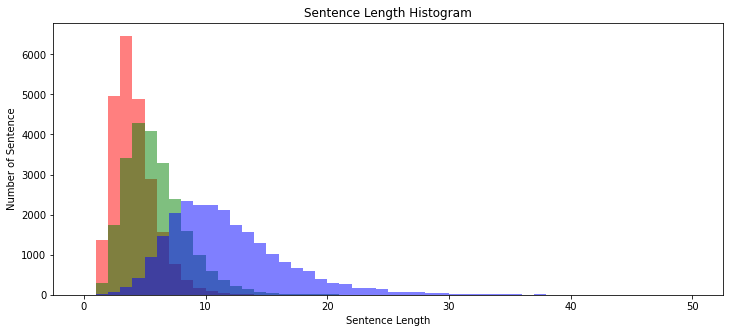

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,5))
plt.hist(sent_len_by_token, bins = 50, range = [0,50], alpha = 0.5, color = 'r', label = 'eojeol') # 단어 단위 길이 분석
plt.hist(sent_len_by_morph, bins = 50, range = [0,50], alpha = 0.5, color = 'g', label = 'morph')  # 형태소 단위 길이 분석
plt.hist(sent_len_by_eumjeol, bins = 50, range = [0,50], alpha = 0.5, color = 'b', label = 'eojeol') # 문자 단위 길이 분석
plt.title("Sentence Length Histogram")
plt.xlabel("Sentence Length")
plt.ylabel("Number of Sentence")

Text(0, 0.5, 'Number of Sentence')

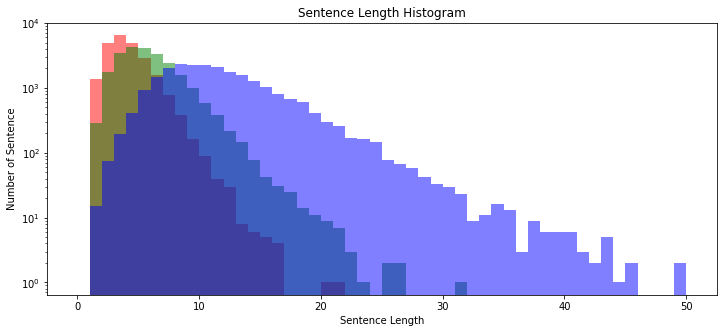

In [27]:
# 위의 결과는 y값 분포가 달라 직관적으로 확인 힘듦 - y값 크기 조정함으로써 해결
plt.figure(figsize = (12,5))
plt.hist(sent_len_by_token, bins = 50, range = [0,50], alpha = 0.5, color = 'r', label = 'eojeol') # 단어 단위 길이 분석
plt.hist(sent_len_by_morph, bins = 50, range = [0,50], alpha = 0.5, color = 'g', label = 'morph')  # 형태소 단위 길이 분석
plt.hist(sent_len_by_eumjeol, bins = 50, range = [0,50], alpha = 0.5, color = 'b', label = 'eojeol') # 문자 단위 길이 분석
plt.yscale("log") # y 로그로 조절
plt.title("Sentence Length Histogram")
plt.xlabel("Sentence Length")
plt.ylabel("Number of Sentence")

In [28]:
import numpy as np
# 어절(단어)
lists = [sent_len_by_token,sent_len_by_morph, sent_len_by_eumjeol]
for i in lists:
  if i == sent_len_by_token:
    print("단어")
    print("최대 길이 : {}".format(np.max(i)))
    print("최소 길이 : {}".format(np.min(i)))
    print("평균 길이 : {:.2f}".format(np.mean(i)))
    print("길이 표준편차 : {:.2f}".format(np.std(i)))
    print("중간 길이 : {}".format(np.median(i)))
    print("제1사분위 길이 : {}".format(np.percentile(i,25)))
    print("제3사분위 길이 : {}".format(np.percentile(i,75)))
    print("\n")
  elif i == sent_len_by_morph:
    print("형태소")
    print("최대 길이 : {}".format(np.max(i)))
    print("최소 길이 : {}".format(np.min(i)))
    print("평균 길이 : {:.2f}".format(np.mean(i)))
    print("길이 표준편차 : {:.2f}".format(np.std(i)))
    print("중간 길이 : {}".format(np.median(i)))
    print("제1사분위 길이 : {}".format(np.percentile(i,25)))
    print("제3사분위 길이 : {}".format(np.percentile(i,75)))
    print("\n")
  else:
    print("문자")
    print("최대 길이 : {}".format(np.max(i)))
    print("최소 길이 : {}".format(np.min(i)))
    print("평균 길이 : {:.2f}".format(np.mean(i)))
    print("길이 표준편차 : {:.2f}".format(np.std(i)))
    print("중간 길이 : {}".format(np.median(i)))
    print("제1사분위 길이 : {}".format(np.percentile(i,25)))
    print("제3사분위 길이 : {}".format(np.percentile(i,75)))

단어
최대 길이 : 21
최소 길이 : 1
평균 길이 : 3.64
길이 표준편차 : 1.74
중간 길이 : 3.0
제1사분위 길이 : 2.0
제3사분위 길이 : 5.0


형태소
최대 길이 : 31
최소 길이 : 1
평균 길이 : 5.41
길이 표준편차 : 2.56
중간 길이 : 5.0
제1사분위 길이 : 4.0
제3사분위 길이 : 7.0


문자
최대 길이 : 57
최소 길이 : 1
평균 길이 : 11.31
길이 표준편차 : 4.98
중간 길이 : 10.0
제1사분위 길이 : 8.0
제3사분위 길이 : 14.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f40da2b7d50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f40da265810>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f40da2b77d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f40da26a310>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f40da26a850>,
 'means': []}

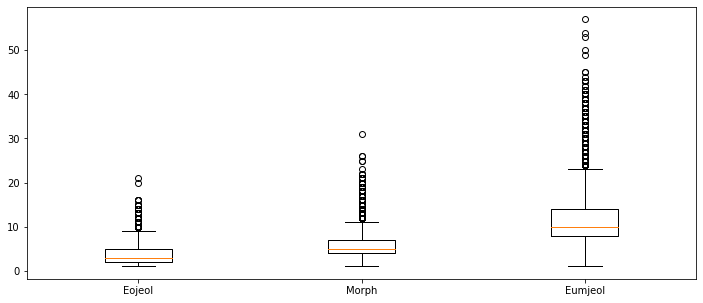

In [29]:
plt.figure(figsize =(12,5))
plt.boxplot([sent_len_by_token, sent_len_by_morph, sent_len_by_eumjeol],
            labels = ['Eojeol', "Morph", "Eumjeol"])

In [30]:
# 질문, 답변 각각에 대한 문장 길이 분포 분석
# 행태소 기준으로만 길이 분석
query_sentences = list(data['Q'])
answer_sentences = list(data['A'])

query_morph_tokenized_sentences = [okt.morphs(s.replace(" ",'')) for s in query_sentences]
query_sent_len_by_morph = [len(t) for t in query_morph_tokenized_sentences]

answer_morph_tokenized_sentences = [okt.morphs(s.replace(" ",'')) for s in answer_sentences]
answer_sent_len_by_morph = [len(t) for t in answer_morph_tokenized_sentences]

Text(0, 0.5, 'Number of Queries')

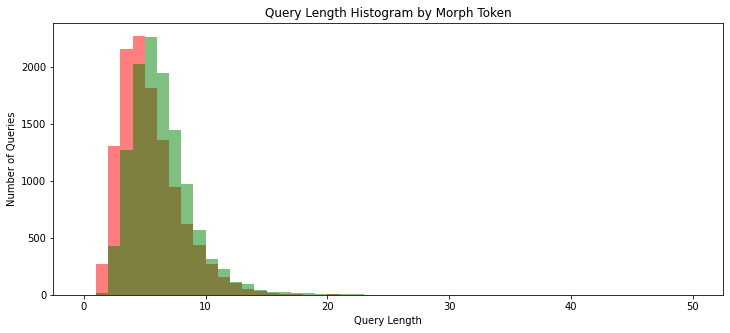

In [31]:
plt.figure(figsize = (12,5))
plt.hist(query_sent_len_by_morph, bins = 50, range = [0,50], alpha = 0.5, color = 'r', label = 'Query') # 질문 형태소 길이 분석
plt.hist(answer_sent_len_by_morph, bins = 50, range = [0,50], alpha = 0.5, color = 'g', label = 'Answer')  # 대답 형태소 단위 길이 분석
plt.title("Query Length Histogram by Morph Token")
plt.xlabel("Query Length")
plt.ylabel("Number of Queries")

Text(0, 0.5, 'Number of Queries')

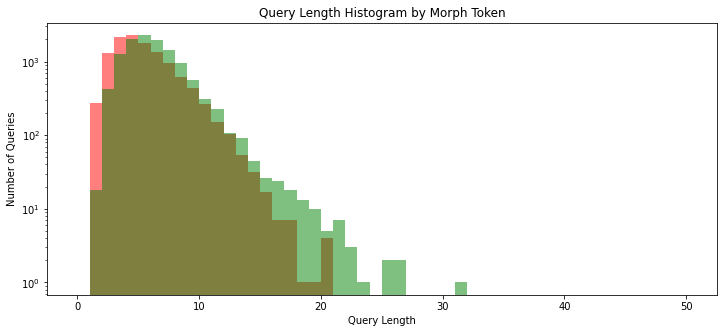

In [32]:
plt.figure(figsize = (12,5))
plt.hist(query_sent_len_by_morph, bins = 50, range = [0,50], alpha = 0.5, color = 'r', label = 'Query') # 질문 형태소 길이 분석
plt.hist(answer_sent_len_by_morph, bins = 50, range = [0,50], alpha = 0.5, color = 'g', label = 'Answer')  # 대답 형태소 단위 길이 분석
plt.yscale("log")
plt.title("Query Length Histogram by Morph Token")
plt.xlabel("Query Length")
plt.ylabel("Number of Queries")

In [33]:
lists = [query_sent_len_by_morph,answer_sent_len_by_morph]
for i in lists:
  if i == query_sent_len_by_morph:
    print("질문")
    print("최대 길이 : {}".format(np.max(i)))
    print("최소 길이 : {}".format(np.min(i)))
    print("평균 길이 : {:.2f}".format(np.mean(i)))
    print("길이 표준편차 : {:.2f}".format(np.std(i)))
    print("중간 길이 : {}".format(np.median(i)))
    print("제1사분위 길이 : {}".format(np.percentile(i,25)))
    print("제3사분위 길이 : {}".format(np.percentile(i,75)))
    print("\n")
  elif i == answer_sent_len_by_morph:
    print("대답")
    print("최대 길이 : {}".format(np.max(i)))
    print("최소 길이 : {}".format(np.min(i)))
    print("평균 길이 : {:.2f}".format(np.mean(i)))
    print("길이 표준편차 : {:.2f}".format(np.std(i)))
    print("중간 길이 : {}".format(np.median(i)))
    print("제1사분위 길이 : {}".format(np.percentile(i,25)))
    print("제3사분위 길이 : {}".format(np.percentile(i,75)))
    print("\n")

질문
최대 길이 : 20
최소 길이 : 1
평균 길이 : 4.95
길이 표준편차 : 2.48
중간 길이 : 4.0
제1사분위 길이 : 3.0
제3사분위 길이 : 6.0


대답
최대 길이 : 31
최소 길이 : 1
평균 길이 : 5.87
길이 표준편차 : 2.55
중간 길이 : 5.0
제1사분위 길이 : 4.0
제3사분위 길이 : 7.0




{'whiskers': [<matplotlib.lines.Line2D at 0x7f40d9236cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f40d923a790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f40d9236790>,
 'medians': [<matplotlib.lines.Line2D at 0x7f40d923f290>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f40d923f7d0>,
 'means': []}

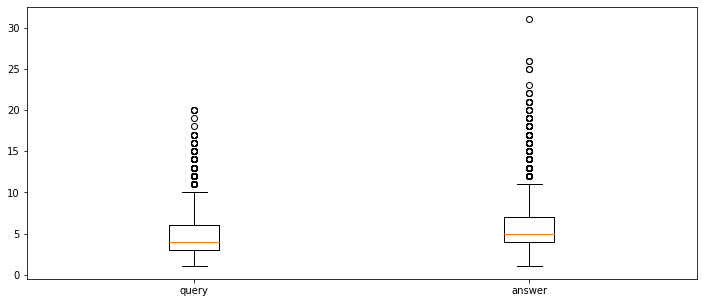

In [34]:
plt.figure(figsize =(12,5))
plt.boxplot([query_sent_len_by_morph, answer_sent_len_by_morph],
            labels = ["query", 'answer'])

통계값의 결과와 달리 평균 길이가 질문 데이터가 더 큼
->답변 데이터 이상치가 많아 평균값 더욱 크게 측정됨


In [35]:
# 데이터 어휘 빈도 분석
# 형태소 단위로 토크나이징한 데이터를 사용하여 자주 사용하는 단어 알아보기
# 의미상 가장 중요한 명사, 형용사, 동사만 모아 모은 후 빈도수 분석 실시
okt.pos("오늘밤은유난히덥구나")

[('오늘밤', 'Noun'), ('은', 'Josa'), ('유난히', 'Adverb'), ('덥구나', 'Adjective')]

In [36]:
# 질문, 대답 문장에서 명사, 동사, 형용사만 골라내기
query_NVA_token_sentences = list()   # 질문에서 명사, 동사, 형용사 골라내기
answer_NVA_token_sentences = list()  # 대답에서 명사, 동사, 형용사 골라내기

for s in query_sentences:
  for token, tag in okt.pos(s.replace(" ","")):
    if tag == "Noun" or tag == "Verb" or tag == "Adjective":
      query_NVA_token_sentences.append(token)

for s in answer_sentences:
  for token, tag in okt.pos(s.replace(" ","")):
    if tag == "Noun" or tag == "Verb" or tag == "Adjective":
      answer_NVA_token_sentences.append(token)

In [37]:
query_NVA_token_sentences = ' '.join(query_NVA_token_sentences)
answer_NVA_token_sentences = ' '.join(answer_NVA_token_sentences)

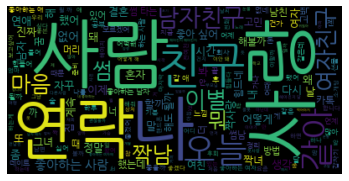

In [38]:
# 워드클라우드를 사용해 어휘 빈도 분석(질문)
from wordcloud import WordCloud
query_wordcloud = WordCloud(font_path = DATA_IN_PATH + "NanumGothic-Regular.ttf").generate(query_NVA_token_sentences)
plt.imshow(query_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

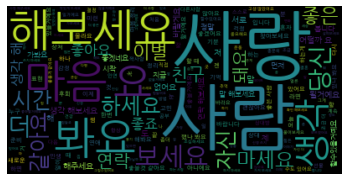

In [39]:
# 워드클라우드를 사용해 어휘 빈도 분석(답변)
from wordcloud import WordCloud
answer_wordcloud = WordCloud(font_path = DATA_IN_PATH + "NanumGothic-Regular.ttf").generate(answer_NVA_token_sentences)
plt.imshow(answer_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### 시퀀스 투 시퀀스 모델(seq2seq)
- 하나의 텍스트 문장이 입력으로 들어오면 하나의 텍스트 문장을 출력하는 구조
- 기계 번역(Machine translation), 텍스트 요약(Text summarizstion), 이미지 설명(Image captioning), 대화 모델(Conversation model) 등 다양한 분야에서 활용

#### preprocess.py

In [40]:
import os
import re
import json

import numpy as np
import pandas as pd
from tqdm import tqdm

from konlpy.tag import Okt

In [41]:
# 데이터 처리 관련 설정값
FILTERS = "([~.,!?\"':;)(])"
PAD = "<PAD>" # 아무 의미 없는 패딩 토큰
STD = "<SOS>" # 시작 토큰
END = "<END>" # 종료 토큰
UNK = "<UNK>" # 사전에 없는 토큰

PAD_INDEX = 0
STD_INDEX = 1
END_INDEX = 2
UNK_INDEX = 3

MARKER = [PAD, STD, END, UNK]
CHANGE_FILTER = re.compile(FILTERS) # 정규 표현식 모듈을 사용해 컴파일, 패턴 사용할 때 반복 컴파일 시간 줄여줌

MAX_SEQUENCE = 25

In [42]:
# load_data - 데이터를 판다스를 통해 불러오는 함수
def load_data(path):
  data_df = pd.read_csv(path, header = 0)
  question, answer = list(data_df['Q']), list(data_df['A'])

  return question, answer

In [43]:
# data-tokenizser - 데이터 전처리 후 단어 리스트 만들기
def data_tokenizer(data):
  words = []
  for sentence in data:
    sentence = re.sub(CHANGE_FILTER,"", sentence) # 특수문자 제거
    for word in sentence.split():
      words.append(word)  # 공백 문자 기준 단어 나눠 리스트 만들기
  return [word for word in words if word]

In [44]:
# prepo_like_morphilized - 한글 텍스트 토크나이징하기 위해 형태소로 분리하는 함수
def prepo_like_morphilized(data):
  morph_analyzer = Okt()
  result_data = list()
  for seq in tqdm(data):
    morphlized_seq = " ".join(morph_analyzer.morphs(seq.replace(" ",'')))
    result_data.append(morphlized_seq)
  
  return morphilized_seq

In [45]:
# load_vocabulary - 단어 사전 호출하기
def load_vocabulary(path, vocab_path, tokenize_as_morph=False):
  vocabulary_list = []
  if not os.path.exists(vocab_path):   # 단어 사전 없는 경우
    if (os.path.exists(path)):
      data_df = pd.read_csv(path, encoding = "UTF-8")
      question, answer = list(data_df['Q']), list(data_df['A'])
      data = []
      data.extend(question)
      data.extend(answer)

      words = data_tokenizer(data)
      words = list(set(words)) # set을 사용해 단어의 중복 제거
      words[:0] = MARKER # 사전에 정의한 토큰들을 단어 리스트 앞에 추가
    
    with open(vocab_path, 'w', encoding = "UTF-8") as vocabulary_file:  # 새로 만들기
      for word in words:
        vocabulary_file.write(word + '\n')

      
  with open(vocab_path, 'r', encoding = "UTF-8") as vocabulary_file: # 있는 경우 받아서 사용하기
    for line in vocabulary_file:
      vocabulary_list.append(line.strip())

  word2idx, idx2word = make_vocabulary(vocabulary_list)

  return word2idx, idx2word, len(word2idx)

In [46]:
# make_vocabulary - 단어 사전 만들기
def make_vocabulary(vocabulary_list):
  # 리스트를 키가 단어이고 값이 인덱스인 딕셔너리 만들기
  word2idx = {word: idx for idx, word in enumerate(vocabulary_list)}
  # 리스트를 키가 인덱스이고 값이 단어인 딕셔너리 만들기
  idx2word = {idx: word for idx, word in enumerate(vocabulary_list)}

  # 두개의 딕셔너리 넘겨주기
  return word2idx, idx2word

# word2idx, idx2word, vocab_size = load_vocabulary(PATH, VOCAB_PATH)

In [47]:
# 인코더에 적용될 입력값 만드는 전처리 함수 확인
def enc_preprocessing(value, dictionary, tokenize_as_morph=False):  # 전처리할 데이터, 단어사전
  sequences_input_index = []
  sequences_length = []

  for sequence in value:
    sequence = re.sub(CHANGE_FILTER,"",sequence) # 특수문자 제거
    sequence_index = []
    
    for word in sequence.split():
      if dictionary.get(word) is not None:
        sequence_index.extend([dictionary[word]])
      else:
        sequence_index.extend([dictionary[UNK]]) # 단어가 단어사전에 없으면 UNK 토큰 넣음

    if len(sequence_index) > MAX_SEQUENCE:  # 최대 길이보다 길면 자르기(패딩)
      sequence_index = sequence_index[:MAX_SEQUENCE]

    sequences_length.append(len(sequence_index))
    sequence_index += (MAX_SEQUENCE - len(sequence_index)) * [dictionary[PAD]] # 최대 길이보다 짧으면 PAD토큰 넣기(패딩)

    sequences_input_index.append(sequence_index)

  return np.asarray(sequences_input_index), sequences_length

In [48]:
# 디코더의 입력값을 만드는 함수
def dec_output_processing(value, dictionary, tokenize_as_morph=False):
  sequences_output_index = []
  sequences_length = []

  for sequence in value:
    sequence = re.sub(CHANGE_FILTER,"",sequence)
    sequence_index = []
    sequence_index = [dictionary[STD]] + [dictionary[word] for word in sequence.split()] # 문장의 처음에 STD. 토큰 넣어주기

    if len(sequence_index) > MAX_SEQUENCE:
      sequence_index = sequence_index[:MAX_SEQUENCE]
    
    sequences_length.append(len(sequence_index))
    sequence_index += (MAX_SEQUENCE-len(sequence_index)) * [dictionary[PAD]]

    sequences_output_index.append(sequence_index)

  return np.asarray(sequences_output_index), sequences_length

In [49]:
# 디코더의 타깃값 만드는 전처리 함수
def dec_target_preprocessing(value, dictionary, tokenize_as_morph=False):
  sequences_target_index = []

  for sequence in value:
    sequence = re.sub(CHANGE_FILTER,"",sequence)
    sequence_index = [dictionary[word] for word in sequence.split()]

    if len(sequence_index) > MAX_SEQUENCE:
      sequence_index = sequence_index[:MAX_SEQUENCE - 1] + [dictionary[END]] # 마지막에 종료 토큰 넣기
    else:
      sequence_index += [dictionary[PAD]]
    
    sequence_index += (MAX_SEQUENCE-len(sequence_index)) * [dictionary[PAD]]
    sequences_target_index.append(sequence_index)

  return np.asarray(sequences_target_index) # 실제길이만 있는 리스트는 제외

#### prepreocess.jpynb

In [64]:
!pip install preprocess

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
from preprocess import *
PATH = "/content/ChatBotData.csv"
VOCAB_PATH = "/content/vocabulary.txt"

In [66]:
inputs, outputs = load_data(PATH) # 학습할 데이터 불러오기
char2idx, idx2char, vocab_size = load_vocabulary(PATH, VOCAB_PATH, tokenize_as_morph=False) # 단어 사전, 띄어쓰기 단위로 토큰화(tokenize_as_morph = False)

In [67]:
# 모델에 학습할 인덱스 데이터 구성
index_inputs, input_seq_len = enc_preprocessing(inputs, char2idx, tokenize_as_morph = False) 
index_outputs, output_seq_len = dec_output_processing(outputs, char2idx, tokenize_as_morph = False)
index_targets = dec_target_preprocessing(outputs, char2idx, tokenize_as_morph = False)

In [68]:
data_configs = {} # 모델 학습할 때와 모델 추론에 활용하기 위해 단어 사전을 저장할 수 있도록 구성
data_configs['char2idx'] = char2idx
data_configs['idx2char'] = idx2char
data_configs['vocab_size'] = vocab_size
data_configs['pad_symbol'] = PAD
data_configs['std_symbol'] = STD
data_configs['end_symbol'] = END
data_configs['unk_symbol'] = UNK

In [69]:
DATA_IN_PATH = '/content/'
TRAIN_INPUTS = 'train_inputs.npy'
TRAIN_OUTPUTS = 'train_outputs.npy'
TRAIN_TARGETS = 'train_targets.npy'
DATA_CONFIGS = 'data_configs.json'

np.save(open(DATA_IN_PATH + TRAIN_INPUTS, 'wb'), index_inputs)
np.save(open(DATA_IN_PATH + TRAIN_OUTPUTS, 'wb'), index_outputs)
np.save(open(DATA_IN_PATH + TRAIN_TARGETS, 'wb'), index_targets)

json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'))

#### seq2seq.jpynb

In [70]:
# 모델 구현하기 위해 사용 - tenforflow, numpy
import tensorflow as tf
import numpy as np
# 운영체제 기능 사용 - os
import os

# 빠른 학습 중지, 모델 체크포인트 위한 케라스 API 사용
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# 시각화 위한 시각화 함수
import matplotlib.pyplot as plt
# 전처리
from preprocess import *

In [71]:
# 시각화 함수 - epoch당 정확도와 손실 값 시각화하는 함수, 직관적으로 학습 상태 파악 가능
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val' + string], '')
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [72]:
DATA_IN_PATH = '/content/'
DATA_OUT_PATH = '/content/'
TRAIN_INPUTS = 'train_inputs.npy'
TRAIN_OUTPUTS = 'train_outputs.npy'
TRAIN_TARGETS = 'train_targets.npy'
DATA_CONFIGS = 'data_configs.json'

In [73]:
# 랜덤 시드값 선언
SEED_NUM = 1234
tf.random.set_seed(SEED_NUM)

In [74]:
# 전처리된 학습에 필요한 데이터와 설정값 불러오기
index_inputs = np.load(open(DATA_IN_PATH + TRAIN_INPUTS, 'rb'))
index_outputs = np.load(open(DATA_IN_PATH + TRAIN_OUTPUTS, 'rb'))
index_targets = np.load(open(DATA_IN_PATH + TRAIN_TARGETS, 'rb'))
prepro_configs = json.load(open(DATA_IN_PATH + DATA_CONFIGS, 'r'))

인코더의 입력, 디코더의 입력, 디코더의 타깃값을 가져왔으므로
- 인코더는 최대 길이만큼 '<'PAD'>'가 붙음
- 인코더 입력 앞에는 '<'SOS'>'가 붙음
- 디코더 타깃값 뒤에는 '<'END'>'가 붙음

In [75]:
# 배열의 크기 확인
print(len(index_inputs), len(input_seq_len), len(index_outputs), len(output_seq_len), len(index_targets))

11823 11823 11823 11823 11823


In [76]:
# 모델 구성하는데 필요한 값 선언
MODEL_NAME = "seq2seq_kor"
BATCH_SIZE = 2      # 배치 크기
MAX_SEQUENCE = 25   
EPOCH = 30   # 전체 학습 데이터를 전체 순회하는 것이 1번
UNITS = 1024 # 재귀 신경망의 결과 차원
EMBEDDING_DIM = 256  # 임베딩 차원
VALIDATION_SPLIT = 0.1   # 데이터의 전체 크기 대비 평가 셋의 크기 비율

char2idx = prepro_configs['char2idx']
idx2char = prepro_configs['idx2char']
std_index = prepro_configs['std_symbol']
end_index = prepro_configs['end_symbol']
vocab_size = prepro_configs['vocab_size']

seq2seq 모델의 중간에 사용되는 신경망은 재귀 신경망으로,

다양한 종류의 재현 신경망 중 GRU모델 사용할 예정

In [77]:
# seq2seq encoder
class Encoder(tf.keras.layers.Layer):  # Encoder 클래스는 Layer를 상속받음
  def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):  # 임베딩 룩업 테이블과 GRU구성 위한 인자 입력으로 받기
    super(Encoder, self).__init__()
    self.batch_sz = batch_sz
    self.enc_units = enc_units
    self.vocab_size = vocab_size
    self.embedding_dim = embedding_dim

    # 사전에 포함된 각 단어를 embedding_dim 차원의 임베딩 벡터로 만듦
    self.embedding = tf.keras.layers.Embedding(self.vocab_size, self.embedding_dim) 
    # GRU 신경망을 만드는 부분
    self.gru = tf.keras.layers.GRU(self.enc_unitsm,           
                                   return_sequences = True,   # 각 시퀀스마다 출력 반환할지의 여부
                                   return_state = True,       # 마지막 상태 값의 반환 여부
                                   recurrent_initializer = 'glorot_uniform')  # 초깃값 선정, glorot_uniform : 이전 노드와 다음 노드의 개수에 의존하는 방법        
    
    def call(self, x, hidden):
      x = self.embedding(x)  # 위 함수에서 만든 embedding 함수를 통해 x값을 임베딩 벡터로 만듦
      output, state = self.gru(x, initial_state = hidden) # 임베딩 벡터와 재귀 순환망의 초기화 상태로 인자로 받은 은닉 상태 전달
      return output, state

    # 배치 크기를 받아 재귀 순환망에 초기에 사용될 크기의 은닉 상태를 만드는 역할
    def initial_hidden_state(self, inp):
      return tf.zeros((tf.shape(inp)[0], self.enc_units))

seq2seq 모델링에서 설명한 인코더 디코더 구조는 seq2seq의 문제점을 보완하기 위해 나온 개념

기존의 seq2seq는 문장이 길어질수록 더 많은 정보를 고정된 길이에 담아야 하므로 정보의 손실이 존재 + 재귀 순환망 특유의 문제인 장기 의존성 문제 발생 가능

이러한 기존의 문제점을 어텐션을 통해 보완하였음.

기존의 seq2seq는 인코더의 고정된 문맥 벡터가 디코더로 전달됨. 

어텐션이 추가된 방법은 은닉 상태의 값을 통해 어텐션을 계산하고 디코더의 각 시퀀스 스텝마다 계산된 어텐션을 입력으로 넣음.

즉, 어텐션도 함께 학습을 진행하게 되며, 학습을 통해 디코더의 각 시퀀스 스텝마다 어텐션의 가중치 다르게 적용



In [79]:
# 어텐션 소스코드
class BahdanaAttention(tf.keras.layers.Layer):
  def __init__(self, units):  # 출력 벡터의 크기를 인자로 받음
    # 출력 크기가 units 크기인 W1, W2, 출력 크기가 1인 V의 완전 연결 계층을 만듦.
    super(BahdanaAttention, self).__init__() 
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  # query - 인코더 재귀 순환망의 은닉층의 상태 값
  # values - 인코더 재귀 순환망의 결괏값
  def call(self, query, values):
    hidden_with_time_axis = tf.expand_dims(query,1)   # query를 W2에 행렬곱을 할 수 있는 형태(shape)를 만듦
    # W1과 W2의 결괏값의 요소를 각각 더하고 하이퍼볼릭 탄젠트 활성함수를 통과한 값을 V에 행렬곱 - 1차원 벡터값 
    score = self.V(tf.nn.tanh(self.W1(values) + self.W2(hidden_with_time_axis)))
    
    # softmax를 통과시켜 가중치 얻음, 영향도 높을수록 1에 가까워짐
    attention_weights = tf.nn.softmax(score, axis = 1)

    # 가중치*값 - 1에 가까운 값에 위치한 value 값은 커지고, 0에 가까우면 작아짐
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis = 1)

    return context_vector, attention_weights

In [ ]:
# 디코더 소스코드